```json
[
	{"bbox_2d": [232, 454, 440, 689], "label": "mushroom"},
	{"bbox_2d": [411, 503, 522, 633], "label": "mushroom"}
]
```
```json
[
	{"bbox_2d": [232, 454, 440, 689], "label": "mushroom"},
	{"bbox_2d": [411, 503, 522, 633], "label": "mushroom"}
]
```
Detections(xyxy=array([[232., 454., 440., 689.],
       [411., 503., 522., 633.]]), mask=None, confidence=None, class_id=array([0, 0]), tracker_id=None, data={'class_name': array(['mushroom', 'mushroom'], dtype='<U8')}, metadata={})


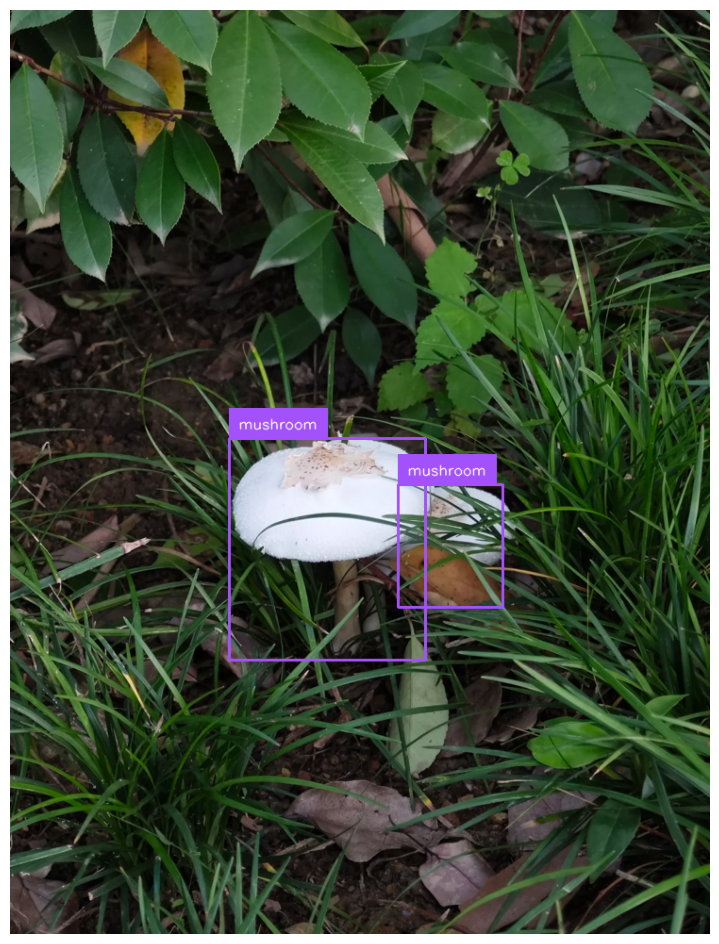

In [11]:
import os
from PIL import Image
from dotenv import load_dotenv
import supervision as sv
load_dotenv()
from openai import OpenAI
from vlm import VLM


client = OpenAI(
    api_key=os.getenv("OPENROUTER_API_KEY"),
    base_url=os.getenv("OPENROUTER_BASE_URL"),
)


sys_prompt = '''
You are a helpful assistant to detect objects in images.
Use JSON array format to output the bounding box of the target object.
JSON return example:

[
	{{"bbox_2d": [65, 91, 497, 493], "label": "{class_name}"}},
	{{"bbox_2d": [330, 133, 1011, 680], "label": "{class_name}"}}
]
'''

prompt = '''
检测图片中所有的蘑菇，当有多个蘑菇时，将每个蘑菇都单独框选出来, label 中的 class_name 为 mushroom，以 JSON 格式输出。
'''

vlm = VLM(client, 'qwen/qwen2.5-vl-72b-instruct')
vlm.set_system_prompt(sys_prompt)

source_image = Image.open("./IMG_2566.PNG")
wh=(1024, 1024)
bboxs = vlm.detect_bbox(source_image, prompt=prompt, json_mode=False, wh=wh)
print(bboxs)

detections = sv.Detections.from_vlm(
    sv.VLM.QWEN_2_5_VL,
    bboxs,
    input_wh=(1024, 1024),
    resolution_wh=(1024, 1024),
    classes=['mushroom'],
)

print(detections)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

source_image.thumbnail(wh)
annotated_image = box_annotator.annotate(scene=source_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)
